# Ada Boost

### Mushroom Hunting : Edible or Poisonous ?

Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

## Goal

Our general goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

<AxesSubplot:xlabel='class', ylabel='count'>

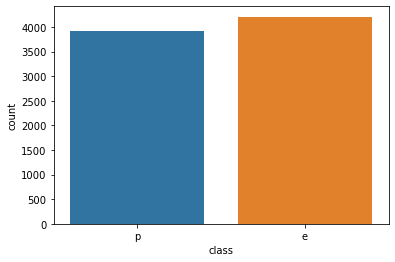

In [4]:
sns.countplot(data=df,x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


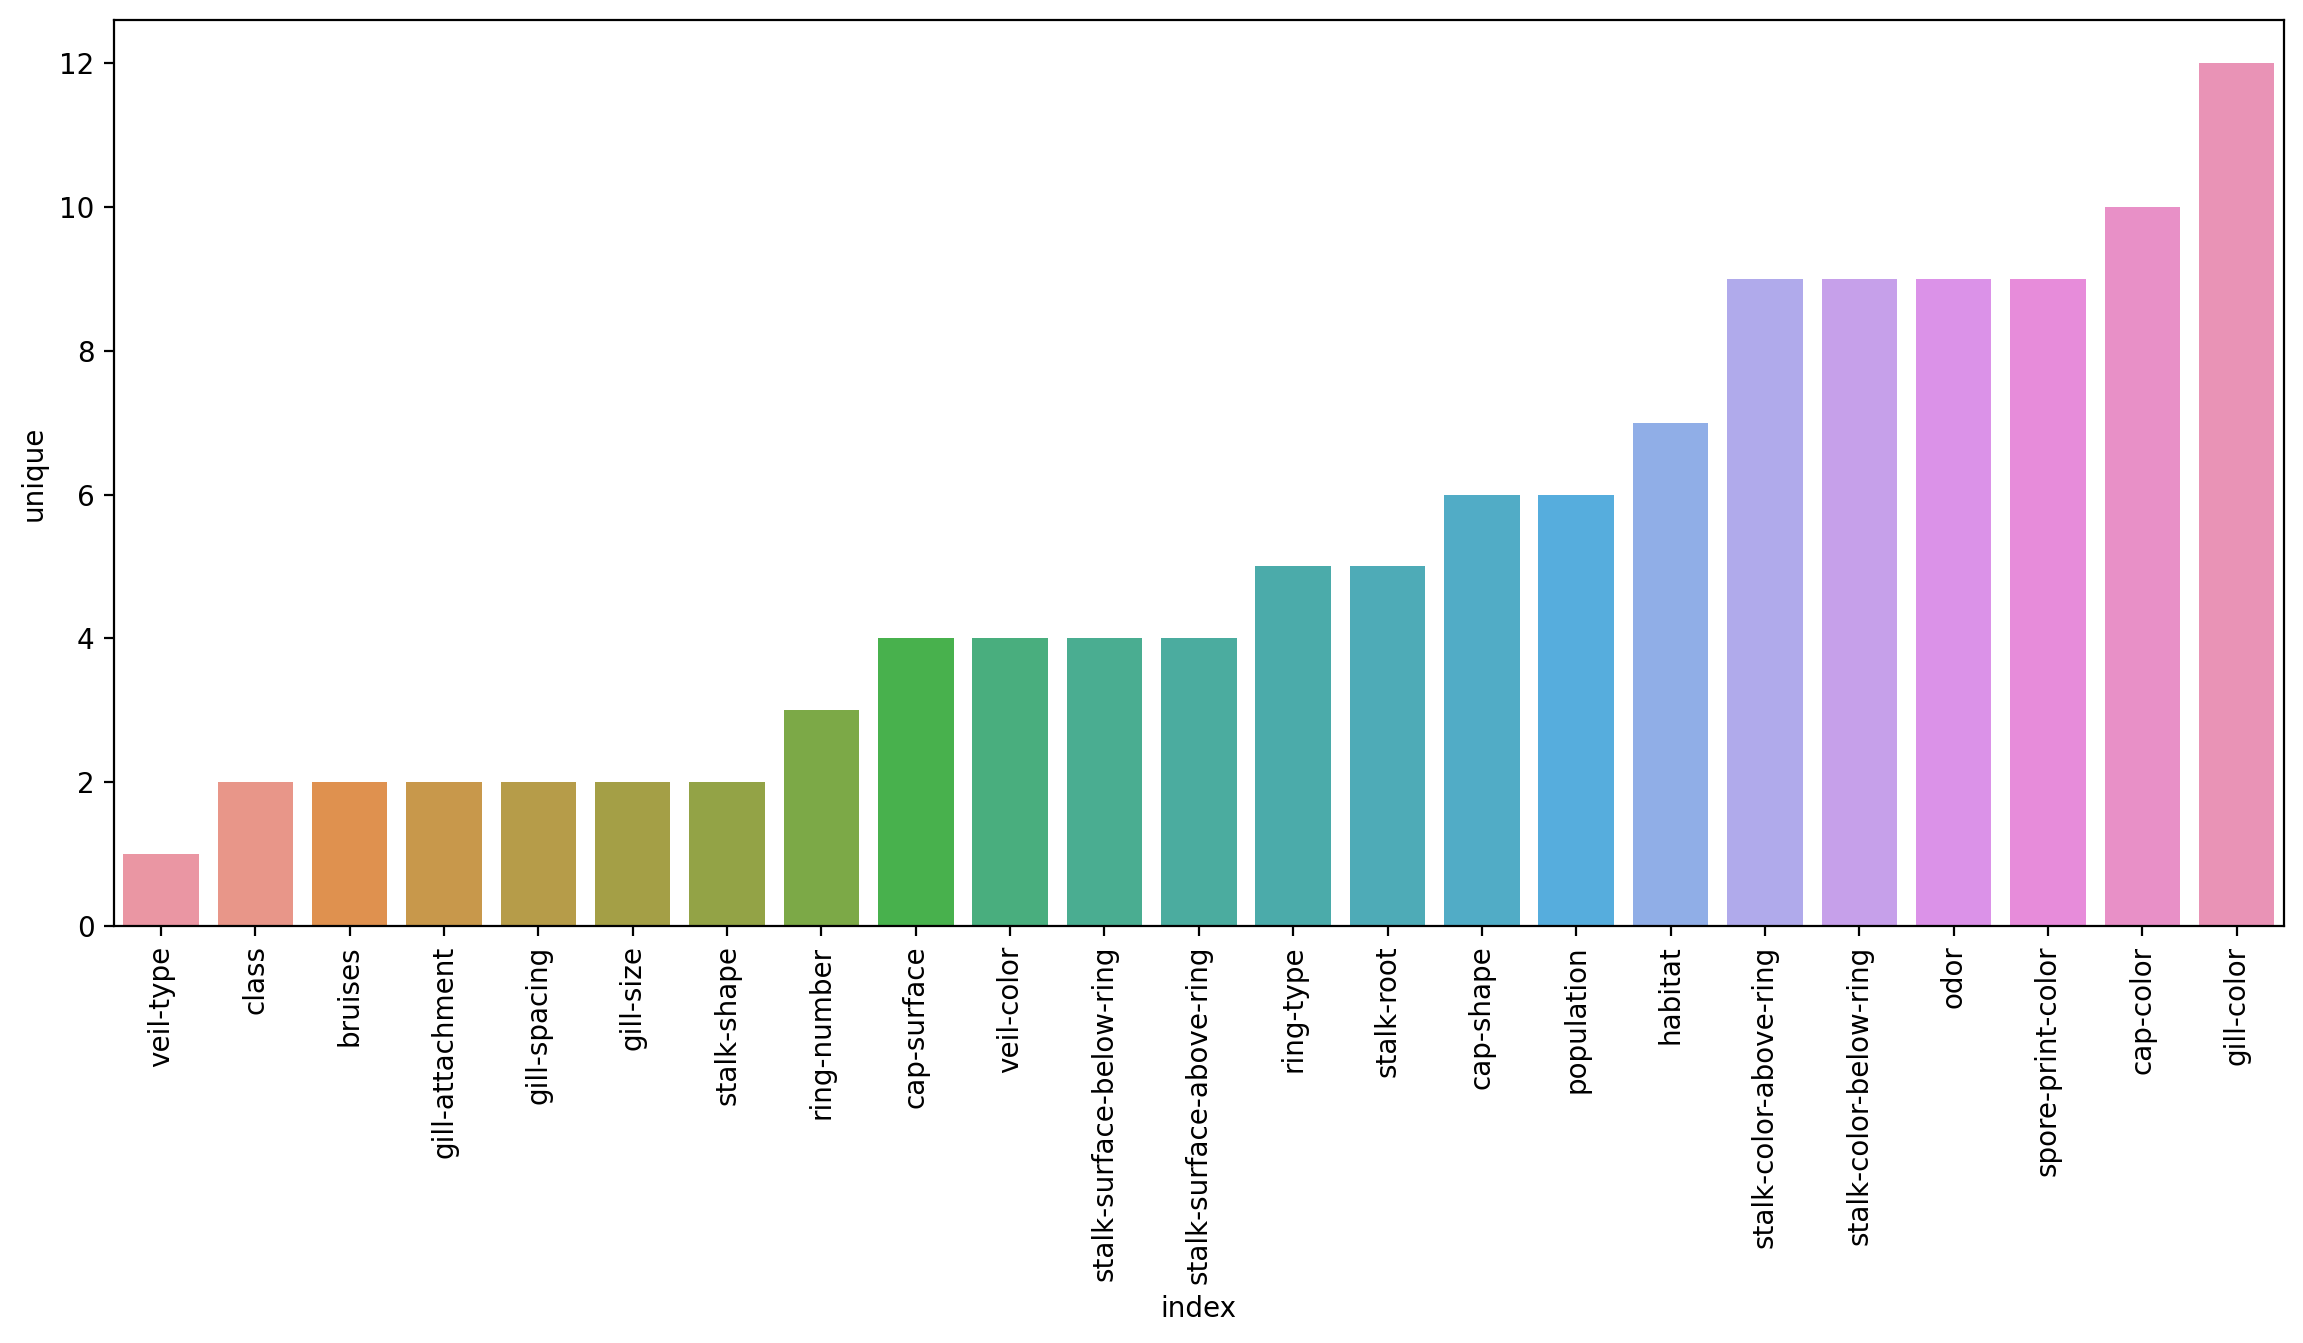

In [7]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

## Train Test Split

In [8]:
X = df.drop('class',axis=1)
y = df['class']

In [9]:
X = pd.get_dummies(X,drop_first=True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Modeling

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
model = AdaBoostClassifier(n_estimators=1)

In [14]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

## Evaluations

In [15]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [16]:
predictions = model.predict(X_test)

In [17]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [19]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
model.feature_importances_.argmax()

22

In [21]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

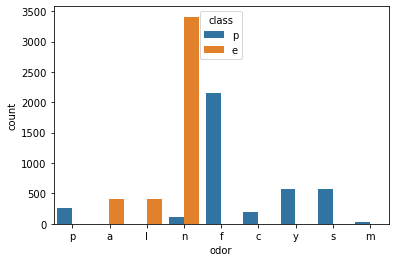

In [22]:
sns.countplot(data=df,x='odor',hue='class')

## Analysing Performance as more weak learners are added

In [23]:
len(X.columns)

95

In [26]:
from sklearn.ensemble import AdaBoostClassifier

error_rates = []

for n in range(1,96):
    
    model =  AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    err = 1-accuracy_score(y_test,predictions)
    
    error_rates.append(err)

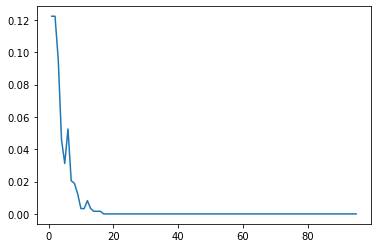

In [27]:
plt.plot(range(1,96),error_rates)

In [28]:
model

AdaBoostClassifier(n_estimators=95)

In [29]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [30]:
X.columns

Index(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-rin

In [32]:
feats = pd.DataFrame(model.feature_importances_,index=X.columns,columns = ['Importance'])

In [33]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [34]:
feats[feats['Importance'] > 0]

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


In [36]:
imp_feats = feats[feats['Importance'] > 0].sort_values('Importance')

In [40]:
imp_feats

,Importance
cap-color_c,0.010526
ring-number_t,0.010526
stalk-color-below-ring_w,0.010526
stalk-root_b,0.010526
stalk-shape_t,0.010526
habitat_w,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
odor_p,0.021053
odor_c,0.031579


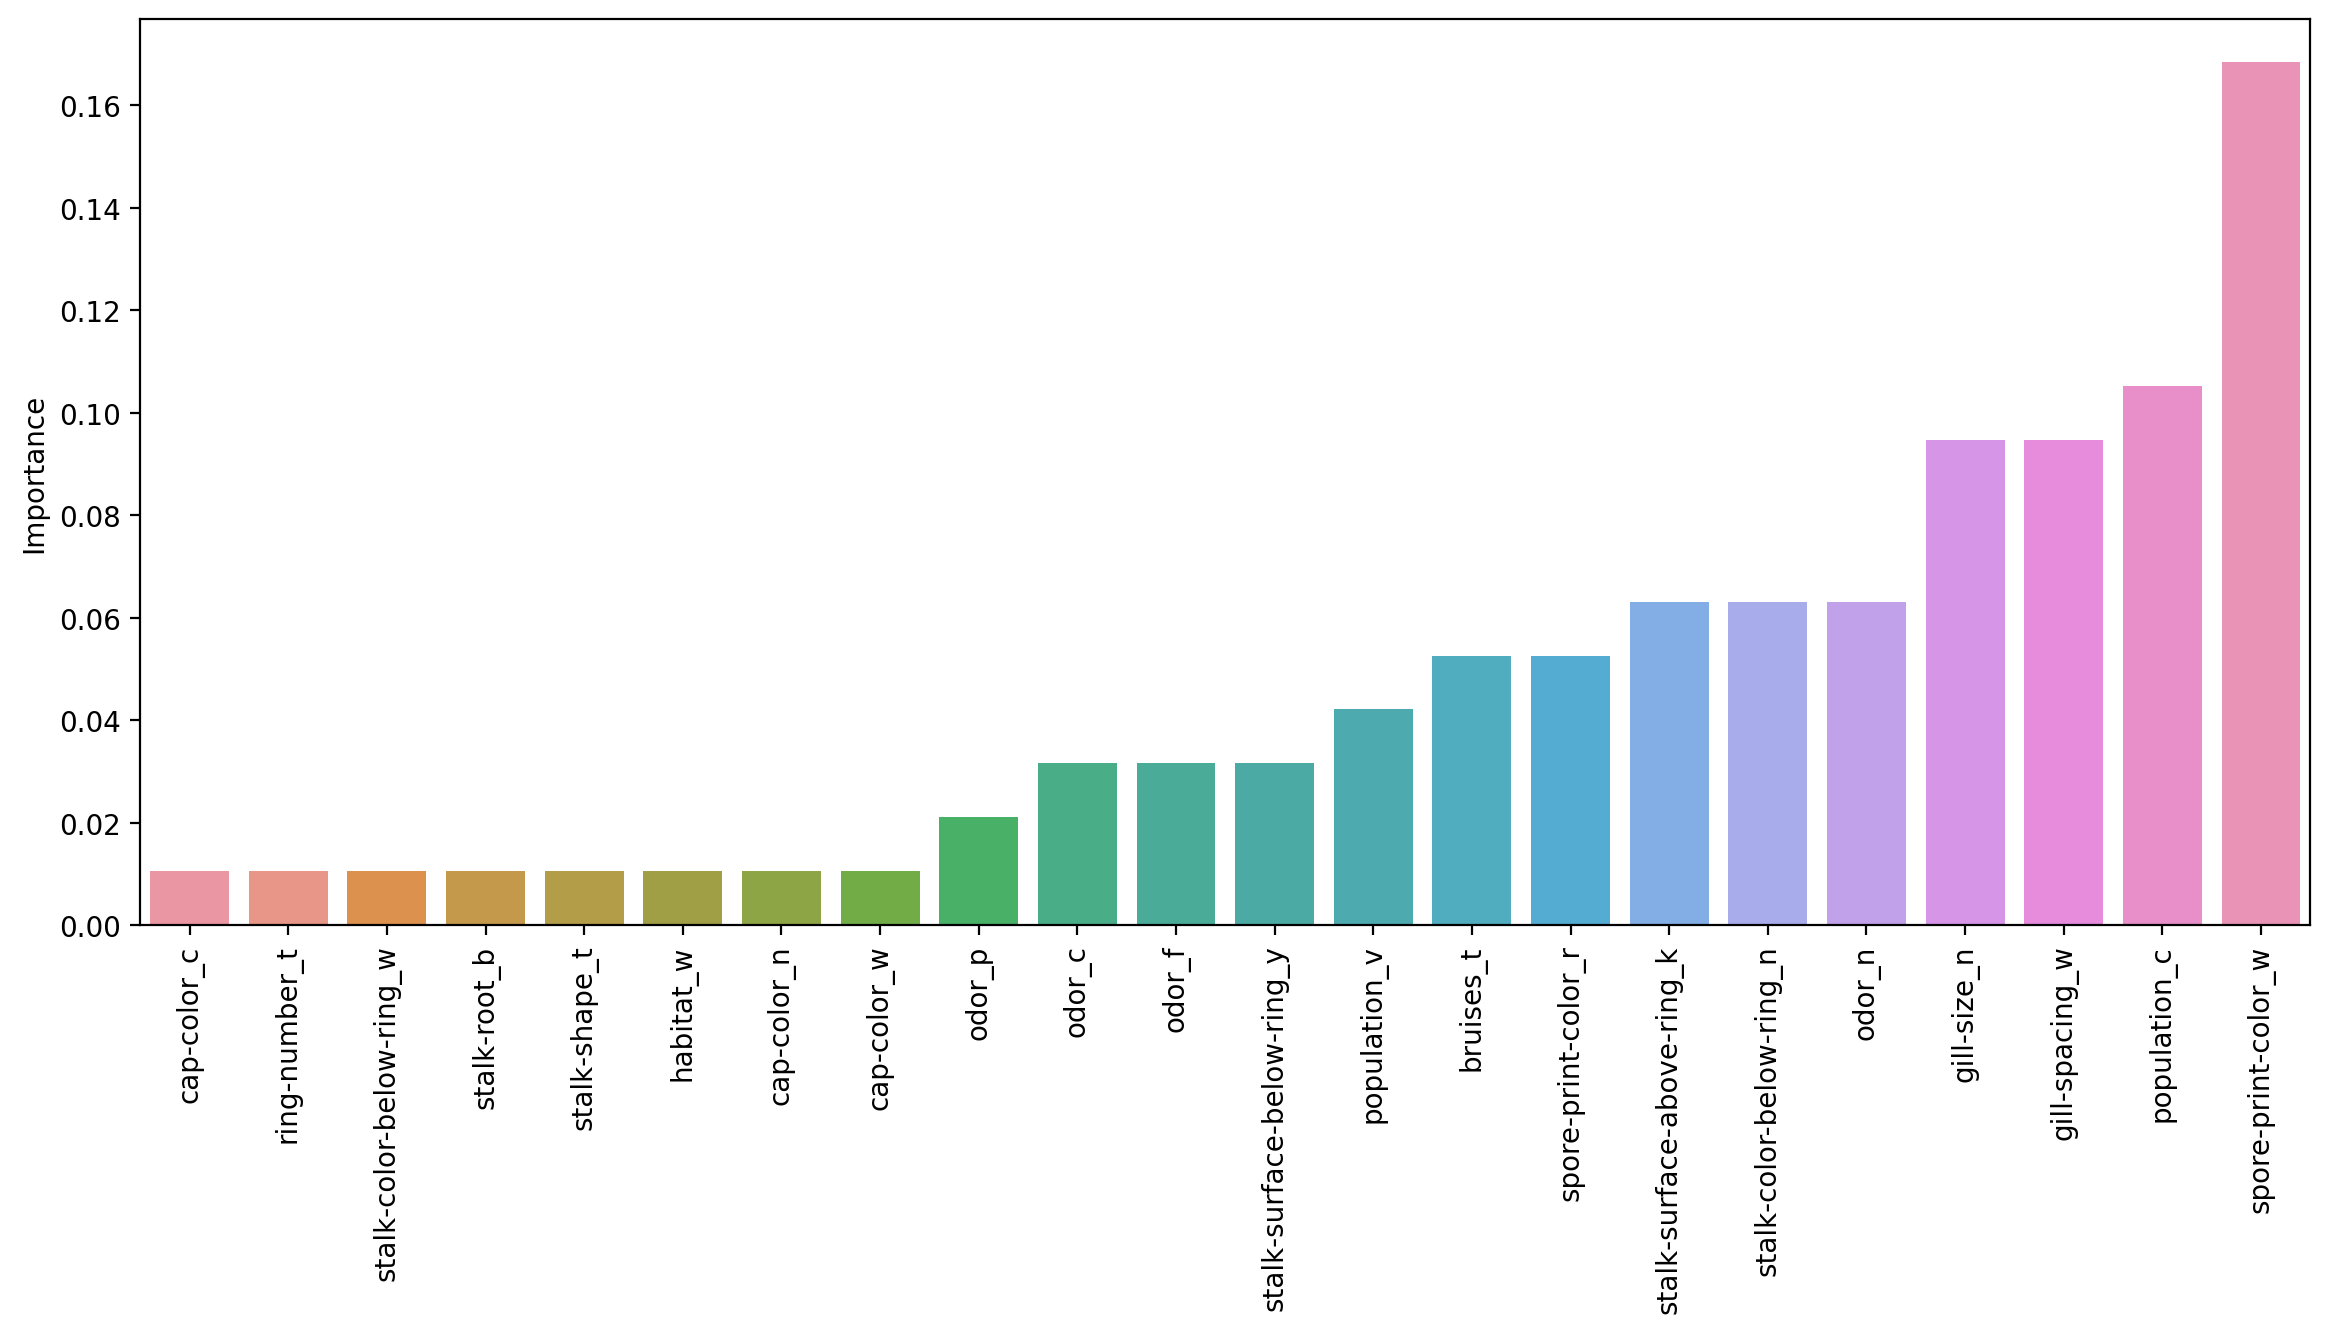

In [44]:
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data = imp_feats,x = imp_feats.index,y = imp_feats['Importance'])
plt.xticks(rotation=90);

## Gradient Boosting and GridSearch

### The Data

![Mushroom](mushroom.jpg)

### Mushroom Hunting: Edible or Poisonous ?

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {"n_estimators":[1,5,10,20,40,100],"max_depth":[3,4,5,6]}

In [48]:
gb_model = GradientBoostingClassifier()

In [49]:
grid = GridSearchCV(estimator=gb_model,param_grid=param_grid)

### Fit to Train Data with CV Search

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [51]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

### Performance

In [52]:
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score

In [53]:
predictions = grid.predict(X_test)

In [54]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [59]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 2.62334123e-16, 1.29861497e-18, 0.00000000e+00,
       9.35203288e-17, 1.04652037e-03, 0.00000000e+00, 3.78276239e-06,
       0.00000000e+00, 6.48725210e-18, 6.12534917e-18, 2.91684747e-18,
       2.91934092e-17, 1.81961056e-21, 0.00000000e+00, 2.22085608e-08,
       2.31055039e-03, 5.12463987e-02, 6.24175887e-04, 1.01961976e-02,
       1.82499853e-02, 1.81489813e-04, 6.14744334e-01, 9.20844491e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25278108e-02,
       1.03950811e-02, 0.00000000e+00, 5.88455951e-17, 0.00000000e+00,
       2.75439734e-17, 0.00000000e+00, 0.00000000e+00, 1.28449714e-17,
       6.65999154e-17, 0.00000000e+00, 1.04379142e-17, 0.00000000e+00,
       2.03408198e-04, 8.42442128e-04, 1.36028897e-01, 7.71855052e-03,
       2.42182643e-02, 4.65375385e-04, 1.43609796e-03, 6.65702318e-06,
       1.76797782e-05, 3.35102835e-03, 4.18781885e-02, 4.42927753e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [60]:
feat_imp = pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])

In [62]:
important_features = feat_imp[feat_imp['Importance'] > 0.0005].sort_values('Importance')

In [63]:
important_features

,Importance
stalk-color-below-ring_w,0.000563
odor_c,0.000624
stalk-root_b,0.000842
odor_p,0.000921
cap-surface_g,0.001047
ring-type_p,0.001051
ring-number_t,0.001145
stalk-surface-above-ring_s,0.001436
cap-color_y,0.002311
stalk-color-below-ring_y,0.003023


In [65]:
important_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,26.0,0.038342,0.12084,0.000563,0.001218,0.004232,0.016819,0.614744


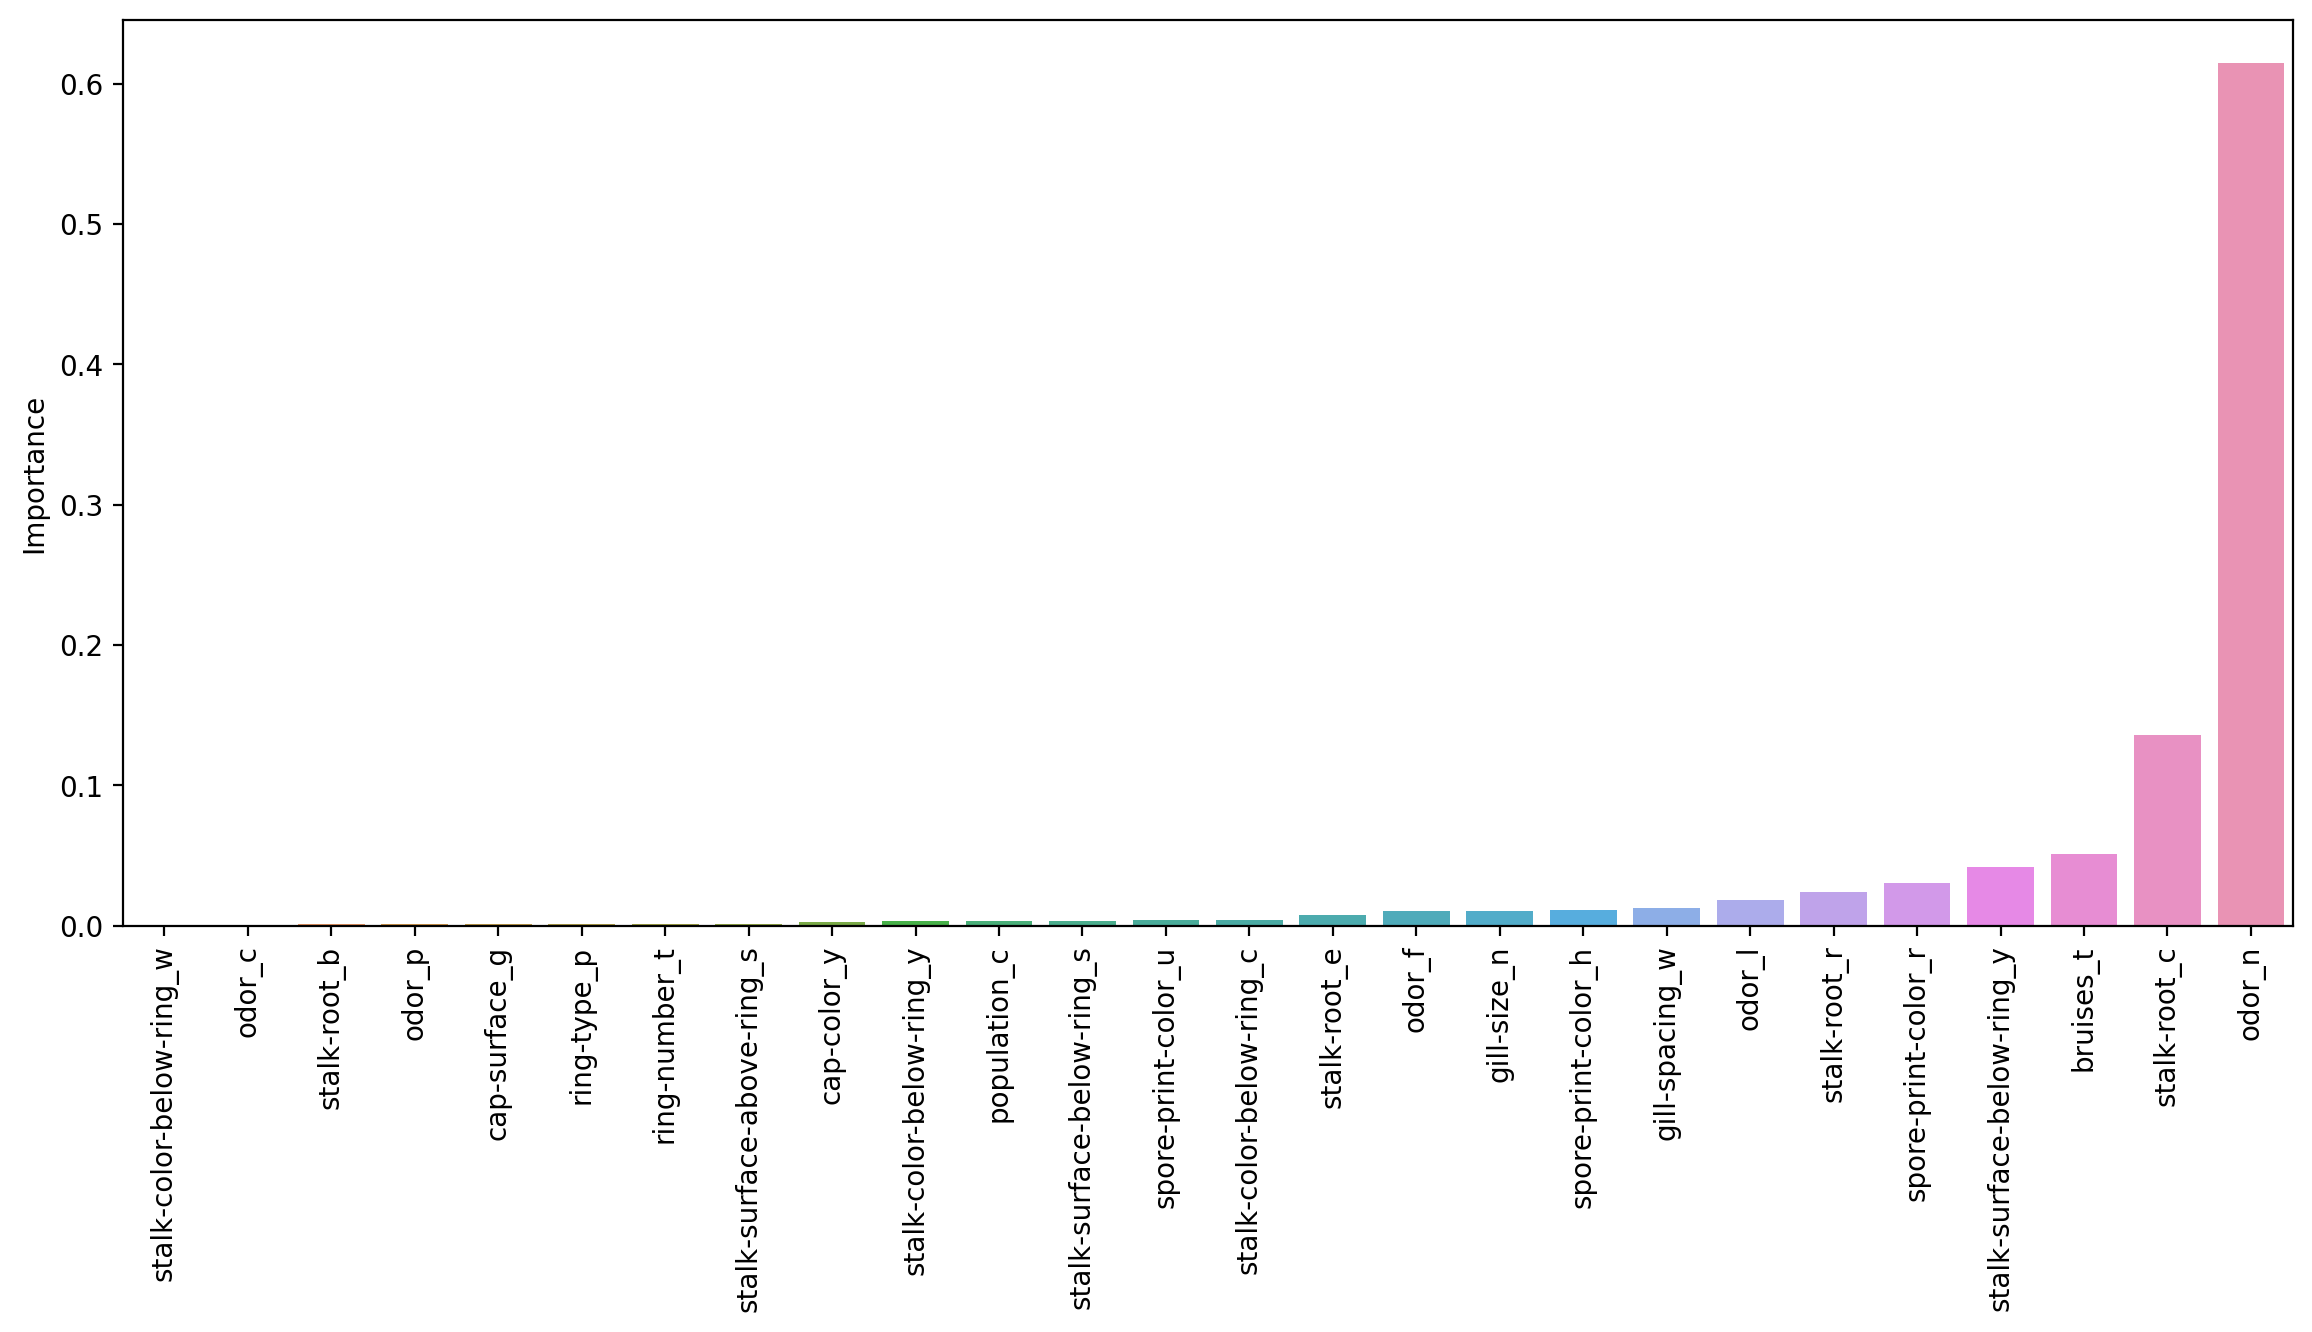

In [68]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=important_features,x=important_features.index,y=important_features['Importance'])
plt.xticks(rotation=90);